<div align="center">
<font size="6"> SIIM-ISIC Melanoma Classification  </font>  
</div> 


<div align="center">
<font size="4"> Identify melanoma in lesion images  </font>  
</div> 

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/logo.png" width="280" height="280" />

Skin cancer is the most prevalent type of cancer. **Melanoma**, specifically, is responsible for **75%** of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.

Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.

As the leading healthcare organization for informatics in medical imaging, the [Society for Imaging Informatics in Medicine (SIIM)](https://siim.org/)'s mission is to advance medical imaging informatics through education, research, and innovation in a multi-disciplinary community. SIIM is joined by the [International Skin Imaging Collaboration (ISIC)](https://www.isic-archive.com/), an international effort to improve melanoma diagnosis. The ISIC Archive contains the largest publicly available collection of quality-controlled dermoscopic images of skin lesions.

In this competition, you’ll identify melanoma in images of skin lesions. In particular, you’ll use images within the same patient and determine which are likely to represent a melanoma. Using patient-level contextual information may help the development of image analysis tools, which could better support clinical dermatologists.

Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/melanoma.png" width="1200" height="450" />

<h2 style=color:Teal align="left"> Table of Contents </h2>

#### 1. ResNet
#### 2. Libraries
##### 2.1 Load Required Libraries
##### 2.2 Load TensorFlow
#### 3. Configs
#### 4 Paths
#### 5. Dataset
##### 5.1 Description
##### 5.2 EDA
#### 6. Keras image data processing
#### 7. Class weights
#### 8. Model
##### 8.1 Build model with ResNet50
##### 8.2 Visualize model with ResNet50
#### 9 Fit model
#### 10. Visualize performance
#### 11. Evaluate on test
#### 12. Submit predictions
#### References

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

if False:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 1. ResNet </h1>

Deeper neural networks are more difficult to train. A residual learning framework is easy to train. The layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions are explicitly reformulated. It has been shown that residual networks are easier to optimize, and can gain accuracy from considerably increased depth. Residual nets (ResNets) are with a depth of up to 152 layers, i.e., x8 deeper than e.g. VGG nets but still having lower complexity. [Kaiming He et all. 2015]

ResNet50 stands for ResNet with 50 layers. See [architecture visualization](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006).

&nbsp;

<div align="center">
<font size="4"> Residual learning: a building block.  </font>  
</div> 

<img align="left" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/A-cell-from-the-Residual-Network-architecture-The-identity-connection-helps-to-reduce.png" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/A-cell-from-the-Residual-Network-architecture-The-identity-connection-helps-to-reduce.png" width="350" height="350" />
The degradation (of training accuracy) indicates that not all systems are similarly easy to optimize. In [Kaiming He et all. 2015] the degradation problem is adressed by introducing a deep residual learning framework. Instead of hoping each few stacked layers directly fit a desired underlying mapping, we explicitly let these layers fit a residual mapping. Formally, denoting the desired underlying mapping as H(x), we let the stacked nonlinear layers fit another mapping of F(x) := H(x)−x. The original mapping is recast into F(x)+x. We hypothesize that it is easier to optimize the residual mapping than to optimize the original, unreferenced mapping. To the extreme, if an identity mapping were optimal, it would be easier to push the residual to zero than to fit an identity mapping by a stack of nonlinear layers. 

The formulation of F(x)+x can be realized by feedforward neural networks with ''shortcut connections'' (see scheme). Shortcut connections are those skipping one or
more layers. In our case, the shortcut connections simply perform identity mapping, and their outputs are added to the outputs of the stacked layers (see scheme). Identity shortcut connections add neither extra parameter nor computational complexity. The entire network can still be trained end-to-end by SGD with backpropagation, and can be easily implemented using common libraries

&nbsp;
&nbsp;


<div align="center">
<font size="4"> Example of a residual network with 34 parameter layers (ResNet34) vs VGG-19 with 19 layers as reference model.  </font>  
</div> 

<img align="center" src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/arch.jpg" data-canonical-src="https://raw.githubusercontent.com/kabartay/kaggle-siim-isic-melanoma-classification/master/materials/arch.jpg" width="670" height="1520" />

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2. Libraries </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2.1 Load Required Libraries </h1>

In [2]:
import os
import re
import glob
import pathlib
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

SEED=123
np.random.seed(SEED)

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 2.2 Load TensorFlow </h1>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 3. Configs </h1>

In [4]:
CFG = dict(
        batch_size        =  16,     # 8; 16; 32; 64; bigger batch size => moemry allocation issue
        epochs            =  20,   # 5; 10; 20;
        verbose           =   1,    # 0; 1
        workers           =   4,    # 1; 2; 3

        optimizer         = 'adam', # 'SGD', 'RMSprop'

        RANDOM_STATE      =  123,   
    
        # Path to save a model
        path_model        = '../working/',

        # Images sizes
        img_size          = 224, 
        img_height        = 224, 
        img_width         = 224, 

        # Images augs
        ROTATION          = 180.0,
        ZOOM              =  10.0,
        ZOOM_RANGE        =  [0.9,1.1],
        HZOOM             =  10.0,
        WZOOM             =  10.0,
        HSHIFT            =  10.0,
        WSHIFT            =  10.0,
        SHEAR             =   5.0,
        HFLIP             = True,
        VFLIP             = True,

        # Postprocessing
        label_smooth_fac  =  0.00,  # 0.01; 0.05; 0.1; 0.2;    
)

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 4. Paths </h1>

In [5]:
BASEPATH = "../input/siim-isic-melanoma-classification"
df_train_full = pd.read_csv(os.path.join(BASEPATH, 'train.csv'))
df_test  = pd.read_csv(os.path.join(BASEPATH, 'test.csv'))
df_sub   = pd.read_csv(os.path.join(BASEPATH, 'sample_submission.csv'))

In [6]:
#train_path = '../input/siim-isic-melanoma-classification/jpeg/train'
#test_path  = '../input/siim-isic-melanoma-classification/jpeg/test'

# Dataset ready for Keras load from directories (structured with respect to classes)
train_path = '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaborationn/Train'
test_path  = '../input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [7]:
train_dir = pathlib.Path(train_path)
test_dir  = pathlib.Path(test_path)

We can load images by
- `.flow_from_directory()` using information from subdirectories which has names from labels (we need to prepare data for that, 9 classes give 9 subdirs). Check [here](https://keras.io/api/preprocessing/image/#flowfromdataframe-method).
- `.flow_from_dataframe()` using information about labels from dataframe. Check [here](https://keras.io/api/preprocessing/image/). 

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5. Dataset </h1>
<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5.1 Description </h1>

This set consists of **2357** images of **malignant** and **benign** oncological diseases, which were formed from [The International Skin Imaging Collaboration (ISIC)](https://www.isic-archive.com/).    
   - All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:  
- actinic keratosis
- basal cell carcinoma
- dermatofibroma
- melanoma
- nevus
- pigmented benign keratosis
- seborrheic keratosis
- squamous cell carcinoma
- vascular lesion

In [8]:
classes=[
    'pigmented benign keratosis',
    'melanoma',
    'vascular lesion',
    'actinic keratosis',
    'squamous cell carcinoma',
    'basal cell carcinoma',
    'seborrheic keratosis',
    'dermatofibroma',
    'nevus'
]

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 5.2 EDA </h1>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
print(df_train_full.head())

# Check the dimensions of the dataset
print("Dimensions of the dataset:", df_train_full.shape)

# Calculate basic statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df_train_full.describe())

# Check for missing values
missing_values = df_train_full.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign       0  
1   unknown           benign       0  
2     nevus           benign       0  
3   unknown           benign       0  
4   unknown           benign       0  
Dimensions of the dataset: (33126, 8)
Summary statistics for numerical columns:
         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.00

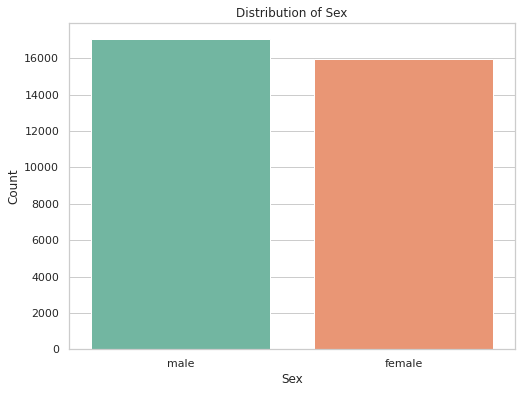

In [10]:
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualize the distribution of 'sex' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train_full, x='sex', palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

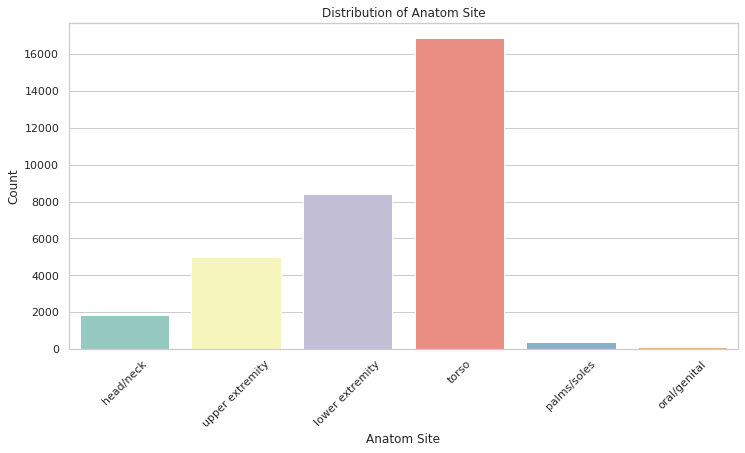

In [11]:
# Visualize the distribution of 'anatom_site_general_challenge' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_full, x='anatom_site_general_challenge', palette='Set3')
plt.title('Distribution of Anatom Site')
plt.xlabel('Anatom Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

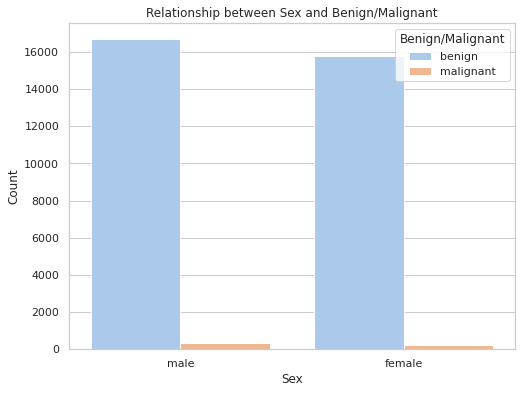

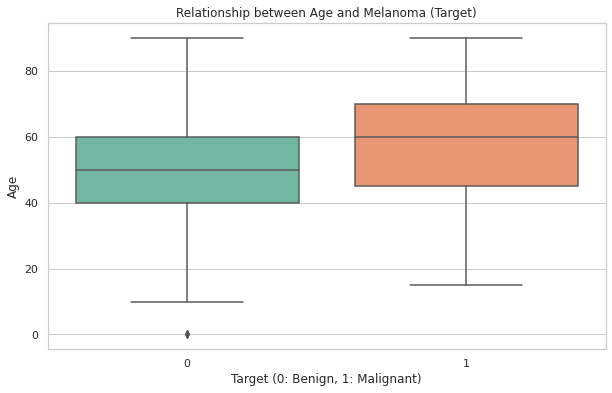

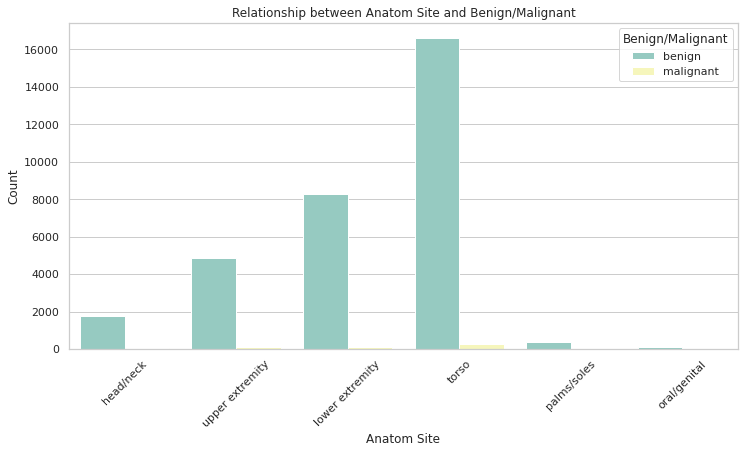

In [12]:
# Explore the relationship between 'sex' and 'target' (benign or malignant)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train_full, x='sex', hue='benign_malignant', palette='pastel')
plt.title('Relationship between Sex and Benign/Malignant')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Benign/Malignant')
plt.show()

# Explore the relationship between 'age_approx' and 'target'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train_full, x='target', y='age_approx', palette='Set2')
plt.title('Relationship between Age and Melanoma (Target)')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Age')
plt.show()

# Explore the relationship between 'anatom_site_general_challenge' and 'target'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_full, x='anatom_site_general_challenge', hue='benign_malignant', palette='Set3')
plt.title('Relationship between Anatom Site and Benign/Malignant')
plt.xlabel('Anatom Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Benign/Malignant')
plt.show()

In [13]:
# Count number of images in each set.
img_count_train = len(list(train_dir.glob('*/*.jpg')))
img_count_test  = len(list(test_dir.glob('*/*.jpg')))
print('{} train images'.format(img_count_train))
print('{} test  images'.format(img_count_test))

0 train images
118 test  images


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data directory
data_directory = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration'

# Define the ImageDataGenerator 
datagen = ImageDataGenerator(
    rescale=1.0/255.0,      # Rescale pixel values to the range [0, 1]
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,   # Randomly flip images horizontally
    validation_split=0.2    # Split the data into training (80%) and validation (20%)
)

# Create the training data generator
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224), # Resize images to 224x224 pixels (adjust as needed)
    batch_size=32,          # Batch size for training
    class_mode='binary',    # Set class_mode to 'binary' or 'categorical' based on your problem
    subset='training'       # Specify that this is the training set
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224), # Resize images to 224x224 pixels (should match training)
    batch_size=32,          # Batch size for validation
    class_mode='binary',    
    subset='validation'     
)

Found 1887 images belonging to 2 classes.
Found 470 images belonging to 2 classes.


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 6. Keras image data processing </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 7. Model </h1>

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define the data directory
data_directory = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration'

# Create an ImageDataGenerator with data augmentation settings
datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Rescale pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,     # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,       # Randomly flip images horizontally
    zoom_range=0.2,             # Randomly zoom into or out of the image by 20%
    brightness_range=[0.8, 1.2] # Randomly adjust brightness by a factor in this range
)

# Create a data generator from the directory with augmentation
data_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(224, 224),     # Target size for resizing images
    batch_size=32,              # Batch size
    class_mode='binary',        # Set to 'binary' for binary classification, 'categorical' for multiclass
    shuffle=True                 # Shuffle the data
)

# Load a pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a custom top layer for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
model.fit(data_generator, epochs=10, steps_per_epoch=len(data_generator))

Found 2357 images belonging to 2 classes.
94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/10
74/74 [==============================] - 94s 1s/step - loss: 0.6466 - accuracy: 0.9417
Epoch 2/10
74/74 [==============================] - 70s 943ms/step - loss: 0.2141 - accuracy: 0.9472
Epoch 3/10
74/74 [==============================] - 70s 943ms/step - loss: 0.2023 - accuracy: 0.9460
Epoch 4/10
74/74 [==============================] - 71s 950ms/step - loss: 0.2124 - accuracy: 0.9480
Epoch 5/10
74/74 [==============================] - 70s 942ms/step - loss: 0.1757 - accuracy: 0.9547
Epoch 6/10
74/74 [==============================] - 70s 946ms/step - loss: 0.1921 - accuracy: 0.9510
Epoch 7/10
74/74 [==============================] - 69s 933ms/step - loss: 0.1807 - accuracy: 0.9536
Epoch 8/10
74/74 [==============================] - 70s 943ms/step - loss: 0.2030 - accuracy: 0.9488
Epoch 9/10
74/74 [==============================] - 71s 952ms/step - loss: 0.2002 - accu

In [16]:
# Calculate the accuracy
accuracy = model.evaluate(validation_generator)[1]

15/15 [==============================] - 9s 574ms/step - loss: 0.2382 - accuracy: 0.9511


In [17]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.11%


In [18]:
# Define the file path where you want to save the model
model_file_path = '/kaggle/working/.h5'

# Save the trained model to the specified file path
model.save(model_file_path)

# Print a message to confirm that the model has been saved
print(f"Model saved to {model_file_path}")

Model saved to /kaggle/working/.h5


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8. Class weights </h1>

In [19]:
# Class weights
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train_generator.classes), 
                                                  train_generator.classes) 

unique_class_weights = np.unique(train_generator.classes)
class_weights_dict   = { unique_class_weights[i]: w for i,w in enumerate(class_weights) }

print('\nCLASS WEIGHTS: {}\n'.format(class_weights))
print(np.unique(train_generator.classes))
print(train_generator.classes)
print(unique_class_weights)
print(Counter(train_generator.classes).keys())   # equals to list(set(x))
print(Counter(train_generator.classes).values()) # counts the elements' frequency


CLASS WEIGHTS: [9.93157895 0.5265067 ]

[0 1]
[0 0 0 ... 1 1 1]
[0 1]
dict_keys([0, 1])
dict_values([95, 1792])


<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8. Model </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8.1 Build model with ResNet50 </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 8.2 Visualize model with ResNet50 </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 9 Fit model </h1>

In [20]:
import os
import re
import glob
import pathlib
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from collections import Counter

from warnings import filterwarnings
filterwarnings('ignore')

SEED = 123
np.random.seed(SEED)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten, Activation, 
    MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D, GlobalMaxPooling2D, add
)

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 10. Visualize performance </h1>

<h1 style="background-color:LightSeaGreen; font-family:newtimeroman; font-size:200%; text-align:left;"> 12. Submit predictions </h1>

In [22]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/kaggle/working/.h5')

In [23]:
import os
import cv2
import numpy as np
import pandas as pd

# Define the directory containing test images
test_image_dir = '/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# List to store predictions and corresponding image filenames
predictions = []
image_filenames = []

# Iterate through test images
for image_filename in os.listdir(test_image_dir):
    if image_filename.endswith('.jpg'):
        image_path = os.path.join(test_image_dir, image_filename)
        # Load and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (224, 224))  # Resize to match model input size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        # Make a prediction
        prediction = model.predict(img)
        predictions.append(prediction[0][0])  
        image_filenames.append(image_filename)  

if len(predictions) == len(image_filenames):
    # Create a DataFrame for predictions
    df_predictions = pd.DataFrame({
        'image_name': image_filenames,
        'target': predictions
    })

    # Save the predictions to a CSV file
    df_predictions.to_csv('submission.csv', index=False)
else:
    print("Error: Predictions and image filenames have different lengths.")

In [24]:
import os
from IPython.display import display, Image

# Define the directory path where your images are located
image_dir = '/kaggle/input/skin-cancer9-classesisic'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Display each image
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    display(Image(filename=image_path))

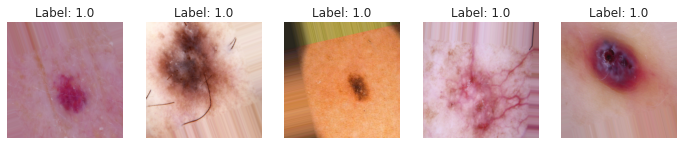

In [25]:
import matplotlib.pyplot as plt

# Visualize some sample images from the training dataset
sample_images, sample_labels = next(train_generator)  # Get a batch of images and labels

# Define a function to display images with their labels
def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')

# Display the sample images
plot_images(sample_images, sample_labels, num_images=5)
plt.show()

In [26]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install tf-slim
!pip install opencv-python

     |████████████████████████████████| 352 kB 6.8 MB/s 


In [27]:
!pip install tensorflow==2.5
!pip install opencv-python-headless

!git clone https://github.com/tensorflow/models.git

import os
os.chdir('/kaggle/working/models/research')
!protoc object_detection/protos/*.proto --python_out=.

with open('object_detection/packages/tf2/setup.py', 'a') as f:
    f.write("\"tf-models-official\",\n")

!python -m pip install .
!python object_detection/builders/model_builder_tf2_test.py
!python /kaggle/working/models/research/object_detection/model_main_tf2.py \
   --pipeline_config_path=PATH_TO_CONFIG_FILE \
   --model_dir=MODEL_DIR \
   --num_train_steps=NUM_TRAIN_STEPS \
   --sample_1_of_n_eval_examples=1 \
   --alsologtostderr
!python /kaggle/working/models/research/object_detection/exporter_main_v2.py \
   --input_type=image_tensor \
   --pipeline_config_path=PATH_TO_CONFIG_FILE \
   --trained_checkpoint_dir=MODEL_DIR \
   --output_directory=EXPORT_DIR

     |████████████████████████████████| 454.3 MB 7.6 kB/s 
     |████████████████████████████████| 462 kB 45.9 MB/s 
     |████████████████████████████████| 4.0 MB 43.2 MB/s 
     |████████████████████████████████| 4.0 MB 44.3 MB/s 
     |████████████████████████████████| 6.0 MB 52.1 MB/s 
     |████████████████████████████████| 1.2 MB 44.9 MB/s 
     |████████████████████████████████| 4.9 MB 55.4 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: h5py
    Found existing installati

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [29]:
input_shape = (224, 224, 3)

In [30]:
input_layer = Input(shape=input_shape)

In [31]:
base_model = tf.keras.applications.ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_tensor=input_layer
)

In [32]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [33]:
model = Model(inputs=input_layer, outputs=output_layer)

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

Epoch 1/10
59/59 [==============================] - 64s 986ms/step - loss: 0.6667 - accuracy: 0.8849
Epoch 2/10
59/59 [==============================] - 58s 980ms/step - loss: 0.1894 - accuracy: 0.9535
Epoch 3/10
59/59 [==============================] - 57s 969ms/step - loss: 0.2033 - accuracy: 0.9545
Epoch 4/10
59/59 [==============================] - 58s 982ms/step - loss: 0.1672 - accuracy: 0.9538
Epoch 5/10
59/59 [==============================] - 58s 971ms/step - loss: 0.1899 - accuracy: 0.9501
Epoch 6/10
59/59 [==============================] - 58s 976ms/step - loss: 0.1710 - accuracy: 0.9553
Epoch 7/10
59/59 [==============================] - 58s 989ms/step - loss: 0.1746 - accuracy: 0.9547
Epoch 8/10
59/59 [==============================] - 59s 991ms/step - loss: 0.1922 - accuracy: 0.9505
Epoch 9/10
59/59 [==============================] - 57s 973ms/step - loss: 0.1807 - accuracy: 0.9523
Epoch 10/10
59/59 [==============================] - 58s 982ms/step - loss: 0.1896 - accura

In [36]:
accuracy = model.evaluate(validation_generator)[1]
print(f'Accuracy: {accuracy * 100:.2f}%')

15/15 [==============================] - 10s 632ms/step - loss: 0.5723 - accuracy: 0.9511
Accuracy: 95.11%


In [37]:
model.save('/kaggle/working/.h5')

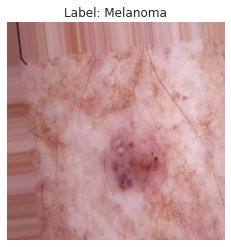

In [38]:
import matplotlib.pyplot as plt

# Select a batch of images and labels from the validation generator
images, labels = validation_generator.next()

# Choose an index to select a specific image from the batch (e.g., index 0)
index = 0

# Get the selected image and label
image = images[index]
label = labels[index]

# Convert the label to a string (0 or 1)
label_str = "Melanoma" if label == 1 else "Non-Melanoma"

# Display the image
plt.imshow(image)
plt.title(f"Label: {label_str}")
plt.axis('off')
plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


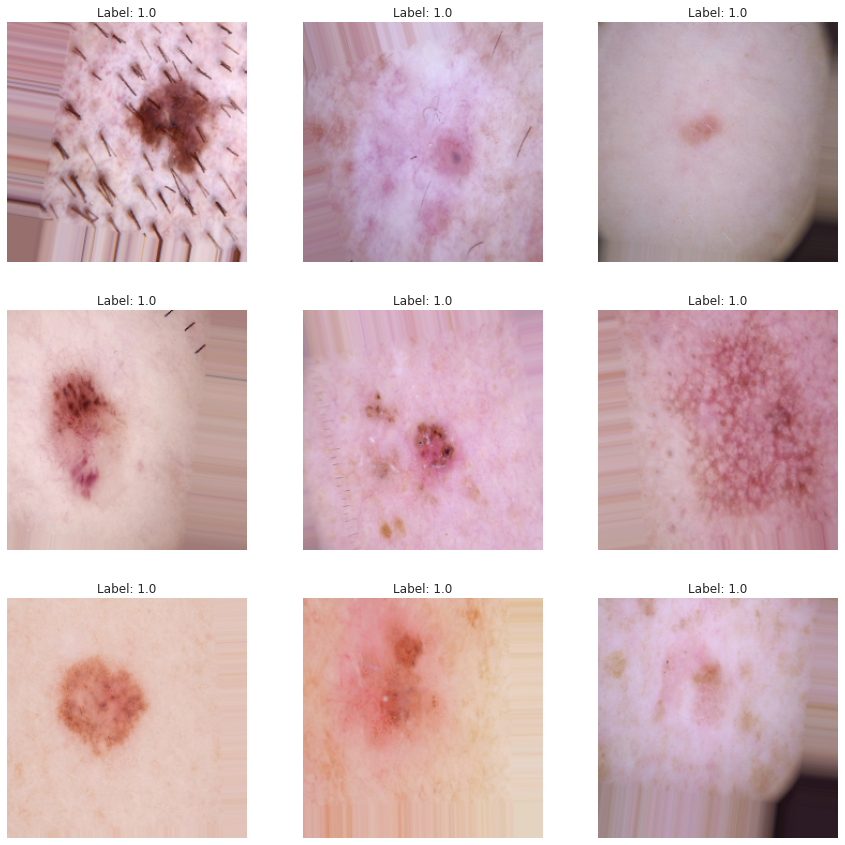

In [39]:
import matplotlib.pyplot as plt
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(15, 15))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        if predictions is not None:
            plt.xlabel(f"Predicted: {predictions[i][0]:.2f}")
        plt.axis("off")
    plt.show()
sample_images, sample_labels = validation_generator.next()
predictions = model.predict(sample_images)
plot_images(sample_images, sample_labels, predictions)

In [40]:
import pandas as pd
dataset_path = '/kaggle/input/siim-isic-melanoma-classification'
train_csv_path = f'{dataset_path}/train.csv'
df_train = pd.read_csv(train_csv_path)
class_names = df_train['diagnosis'].unique()
print("Class Names:", class_names)

Class Names: ['unknown' 'nevus' 'melanoma' 'seborrheic keratosis' 'lentigo NOS'
 'lichenoid keratosis' 'solar lentigo' 'cafe-au-lait macule'
 'atypical melanocytic proliferation']


Class Dictionary: {'unknown': 0, 'nevus': 1, 'melanoma': 2, 'seborrheic keratosis': 3, 'lentigo NOS': 4, 'lichenoid keratosis': 5, 'solar lentigo': 6, 'cafe-au-lait macule': 7, 'atypical melanocytic proliferation': 8}


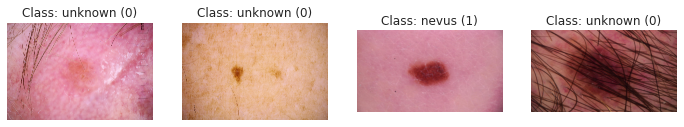

In [41]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/siim-isic-melanoma-classification'
train_csv_path = f'{dataset_path}/train.csv'
df_train = pd.read_csv(train_csv_path)
class_names = df_train['diagnosis'].unique()
class_dict = {class_name: i for i, class_name in enumerate(class_names)}
print("Class Dictionary:", class_dict)

# Function to display images
def show_images(images, labels, class_dict):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]} ({class_dict[labels[i]]})")
        plt.axis('off')
    plt.show()
sample_images = []
sample_labels = []

for idx, row in df_train.head(4).iterrows():
    image_id = row['image_name'] + '.jpg'
    image_path = os.path.join(dataset_path, 'jpeg/train', image_id)
    image = Image.open(image_path)
    sample_images.append(image)
    sample_labels.append(row['diagnosis'])

show_images(sample_images, sample_labels, class_dict)

Class Dictionary: {'unknown': 0, 'nevus': 1, 'melanoma': 2, 'seborrheic keratosis': 3, 'lentigo NOS': 4, 'lichenoid keratosis': 5, 'solar lentigo': 6, 'cafe-au-lait macule': 7, 'atypical melanocytic proliferation': 8}


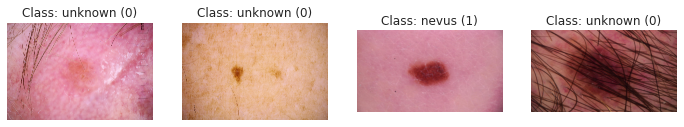

In [42]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/siim-isic-melanoma-classification'
train_csv_path = f'{dataset_path}/train.csv'
df_train = pd.read_csv(train_csv_path)
class_names = df_train['diagnosis'].unique()
class_dict = {class_name: i for i, class_name in enumerate(class_names)}
print("Class Dictionary:", class_dict)
def show_images(images, labels, class_dict):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]} ({class_dict.get(labels[i], 'unknown')})")
        plt.axis('off')
    plt.show()
sample_images = []
sample_labels = []

for idx, row in df_train.head(4).iterrows():
    image_id = row['image_name'] + '.jpg'
    image_path = os.path.join(dataset_path, 'jpeg/train', image_id)
    image = Image.open(image_path)
    sample_images.append(image)
    sample_labels.append(row['diagnosis'])

show_images(sample_images, sample_labels, class_dict)

In [43]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
dataset_path = '/kaggle/input/siim-isic-melanoma-classification'
train_csv_path = f'{dataset_path}/train.csv'
df_train = pd.read_csv(train_csv_path)
class_names = df_train['diagnosis'].unique()
class_dict = {class_name: i for i, class_name in enumerate(class_names)}
print("Class Dictionary:", class_dict)

Class Dictionary: {'unknown': 0, 'nevus': 1, 'melanoma': 2, 'seborrheic keratosis': 3, 'lentigo NOS': 4, 'lichenoid keratosis': 5, 'solar lentigo': 6, 'cafe-au-lait macule': 7, 'atypical melanocytic proliferation': 8}


In [45]:
def show_images(images, labels, class_dict):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i]} ({class_dict.get(labels[i], 'unknown')})")
        plt.axis('off')
    plt.show()

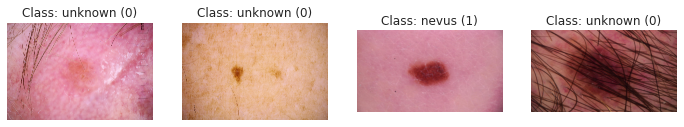

In [46]:
sample_images = []
sample_labels = []

for idx, row in df_train.head(4).iterrows():
    image_id = row['image_name'] + '.jpg'
    image_path = os.path.join(dataset_path, 'jpeg/train', image_id)
    image = Image.open(image_path)
    sample_images.append(image)
    sample_labels.append(row['diagnosis'])

show_images(sample_images, sample_labels, class_dict)

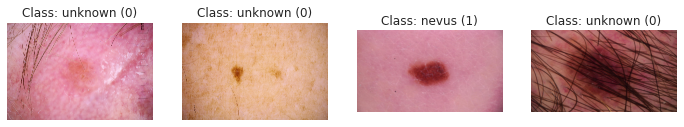

In [47]:
sample_images = []
sample_labels = []

for idx, row in df_train.head(4).iterrows():
    image_id = row['image_name'] + '.jpg'
    image_path = os.path.join(dataset_path, 'jpeg/train', image_id)
    image = Image.open(image_path)
    sample_images.append(image)
    sample_labels.append(row['diagnosis'])

show_images(sample_images, sample_labels, class_dict)

Epoch 1/10
20/20 [==============================] - 2s 59ms/step - loss: 1198.1616 - val_loss: 160.7218
Epoch 2/10
20/20 [==============================] - 1s 36ms/step - loss: 157.4218 - val_loss: 111.2987
Epoch 3/10
20/20 [==============================] - 1s 38ms/step - loss: 86.2558 - val_loss: 59.1081
Epoch 4/10
20/20 [==============================] - 1s 40ms/step - loss: 51.4113 - val_loss: 42.9094
Epoch 5/10
20/20 [==============================] - 1s 37ms/step - loss: 35.0007 - val_loss: 40.8682
Epoch 6/10
20/20 [==============================] - 1s 36ms/step - loss: 24.6145 - val_loss: 32.1237
Epoch 7/10
20/20 [==============================] - 1s 36ms/step - loss: 18.8675 - val_loss: 29.6155
Epoch 8/10
20/20 [==============================] - 1s 36ms/step - loss: 14.1852 - val_loss: 27.9668
Epoch 9/10
20/20 [==============================] - 1s 36ms/step - loss: 10.6456 - val_loss: 25.0679
Epoch 10/10
7/7 [==============================] - 0s 29ms/step - loss: 29.8213
Test L

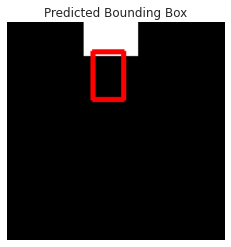

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
def generate_synthetic_dataset(num_samples=1000, image_size=(128, 128)):
    images = np.zeros((num_samples, *image_size, 3), dtype=np.uint8)
    labels = np.zeros((num_samples, 4), dtype=np.float32)  # [x, y, width, height]

    for i in range(num_samples):
        x = np.random.randint(0, image_size[0] - 32)
        y = np.random.randint(0, image_size[1] - 32)
        width = np.random.randint(20, 50)
        height = np.random.randint(20, 50)
        image = np.zeros((*image_size, 3), dtype=np.uint8)
        image[y:y+height, x:x+width] = [255, 255, 255]
        images[i] = image
        labels[i] = [x, y, width, height]

    return images, labels
images, labels = generate_synthetic_dataset(num_samples=1000)
images = images / 255.0
split_ratio = 0.8
split_index = int(len(images) * split_ratio)

train_images, test_images = images[:split_index], images[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]
input_shape = (*images.shape[1:],)
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(4, activation='linear')(x)  

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')  
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)
loss = model.evaluate(test_images, test_labels)
print(f'Test Loss: {loss}')
sample_image = test_images[0]
sample_image = np.expand_dims(sample_image, axis=0)
predicted_bbox = model.predict(sample_image)[0]
x, y, width, height = predicted_bbox
sample_image = sample_image[0] * 255.0  
sample_image = sample_image.astype(np.uint8)
cv2.rectangle(sample_image, (int(x), int(y)), (int(x+width), int(y+height)), (255, 0, 0), 2)

plt.imshow(sample_image)
plt.title('Predicted Bounding Box')
plt.axis('off')
plt.show()

In [49]:
import tensorflow as tf

# Load the saved model from a file
loaded_model = tf.keras.models.load_model('/kaggle/working/.h5')

In [50]:
images, labels = generate_synthetic_dataset(num_samples=1000)
images = images / 255.0
split_ratio = 0.8
split_index = int(len(images) * split_ratio)

train_images, test_images = images[:split_index], images[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Define the model
input_shape = (*images.shape[1:],)
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(4, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mse')  

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set and calculate accuracy
loss = model.evaluate(test_images, test_labels)
accuracy = 100.0 - loss  # You can consider this as a simple accuracy metric

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy:.2f}%')

Epoch 1/10
20/20 [==============================] - 1s 43ms/step - loss: 1174.6790 - val_loss: 167.1748
Epoch 2/10
20/20 [==============================] - 1s 36ms/step - loss: 154.8204 - val_loss: 93.0886
Epoch 3/10
20/20 [==============================] - 1s 36ms/step - loss: 76.9387 - val_loss: 62.5604
Epoch 4/10
20/20 [==============================] - 1s 36ms/step - loss: 47.7488 - val_loss: 47.3840
Epoch 5/10
20/20 [==============================] - 1s 36ms/step - loss: 34.2259 - val_loss: 40.6780
Epoch 6/10
20/20 [==============================] - 1s 36ms/step - loss: 24.4698 - val_loss: 35.7026
Epoch 7/10
20/20 [==============================] - 1s 36ms/step - loss: 19.3118 - val_loss: 31.1455
Epoch 8/10
20/20 [==============================] - 1s 36ms/step - loss: 13.4749 - val_loss: 29.1352
Epoch 9/10
20/20 [==============================] - 1s 36ms/step - loss: 11.0767 - val_loss: 27.2287
Epoch 10/10
7/7 [==============================] - 0s 22ms/step - loss: 29.1014
Test Lo

In [51]:
# Save the trained model to a file
model.save('/kaggle/working/.h5')